In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 1. Load Dataset
df = pd.read_csv("CarPrice_Assignment.csv")
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio h

In [3]:
# 2. Preprocessing
df.dropna(inplace=True) 

def convert_categorical(df):
    if 'CarName' in df.columns:
        df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0])
        df.drop('CarName', axis=1, inplace=True)
    df = pd.get_dummies(df, drop_first=True)  
    return df

df = convert_categorical(df)

In [4]:
# Define features and target
X = df.drop(columns=['price'])
y = df['price']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# 3. Model Implementation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }
    print(f"{name} trained successfully!")

Linear Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
Gradient Boosting trained successfully!
Support Vector Regressor trained successfully!


In [8]:

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                          R2 Score           MSE          MAE
Linear Regression         0.898460  8.015938e+06  1907.092482
Decision Tree             0.885808  9.014806e+06  1994.089439
Random Forest             0.958064  3.310635e+06  1266.231780
Gradient Boosting         0.928534  5.641792e+06  1697.744895
Support Vector Regressor -0.100680  8.689213e+07  5701.550003


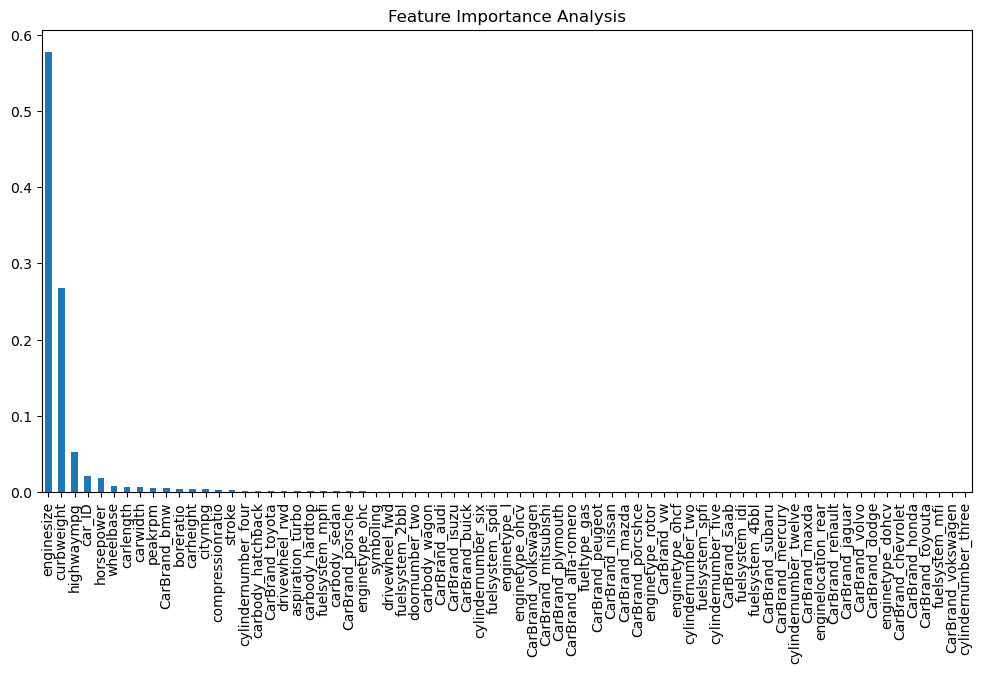

In [9]:
# 4. Feature Importance (For tree-based models)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['price']).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance Analysis")
plt.show()

In [12]:
# 5. Hyperparameter Tuning 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best Hyperparameters:", gs.best_params_)

y_pred_tuned = gs.best_estimator_.predict(X_test)
print("Tuned Model Performance:", r2_score(y_test, y_pred_tuned))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Performance: 0.9580819327335538
